In [21]:
!pip install openai yfinance requests pandas matplotlib

In [45]:
import openai
import yfinance as yf
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import openai
from openai import OpenAI

In [48]:
import os
os.environ["OPENAI_API_KEY"] = "sk-BGo2-zU3KTjrg-H8UWMMYUcyf_rhPPOG_I6Iav9XeUT3BlbkFJwyUTLysUVVx52MnH4gSaWrhg3MPgIipSV6hnPJnnIA"
# 使用環境變數讀取 API 金鑰
openai.api_key = os.getenv("OPENAI_API_KEY")

[*********************100%***********************]  1 of 1 completed

正在獲取 AAPL 的數據...
生成股票分析報告...


### 財務分析報告：蘋果公司 (AAPL)

#### 一、基於技術指標的股票表現分析

從技術指標角度來看：

1. **均線分析**：
   - 20日均線為227.81，50日均線為228.88。當20日均線低於50日均線時，通常被解讀為短期走勢較為疲軟的信號，即短期出現下行趨勢的可能性增大。這反映出市場對蘋果公司近期的價格跌幅有一些擔憂。

2. **RSI 指數分析**：
   - RSI 指數為0.32，這值顯著低於30，表明該股票處於超賣狀態。如此低的RSI通常意味著市場可能存在反彈的機會，投資者過度恐慌可能使得股票被低估。

#### 二、新聞如何影響該股票的簡要分析

近期新聞對蘋果公司股票的影響有以下幾點：

1. **營收報告超過預期**：
   - 蘋果公司公佈高於預期的盈利，這是對其財務健康和持續增長能力的正面信號，應可支撐股價在短期內的上行。投資者對公司基本面的信心可能會在短時間內增強。

2. **分析師的強力買入評級**：
   - 分析師調高蘋果公司的評級至強力買入，這進一步支持了對公司未來表現的樂觀展望，可能吸引更多的機構投資者增加持倉。

3. **市場波動性對表現的影響**：
   - 雖然市場波動性對蘋果的短期表現造成了一定的壓力，但相對分散化和強大財務基礎的公司通常有能力在長遠中保持穩定的回報。市場波動通常可被視為長期投資者的入場機會。

#### 三、專業的投資建議及分數

綜合以上技術指標和新聞影響分析，對於蘋果公司股票的投資建議如下：

- **短期策略**：由於股票的RSI值顯示超賣且市場可能受波動性影響，對於激進型投資者而言可以考慮在近期市場調整時逢低買入。
- **長期策略**：考慮到公司強健的財務表現、高於預期的盈利，以及分析師的強力買入評級，對於保守型長期投資者而言，持有現有股份或在價格調整後逐步買入是值得考量的策略。

**投資建議分數：87/100**

此評分基於公司穩定的基本面、強大的市場地位及近期利好的財務報告。雖然短期市場波動會影響股價，但長期來看，蘋果公司依然是一個具吸引力的投資選擇。
繪製股票數據圖表...


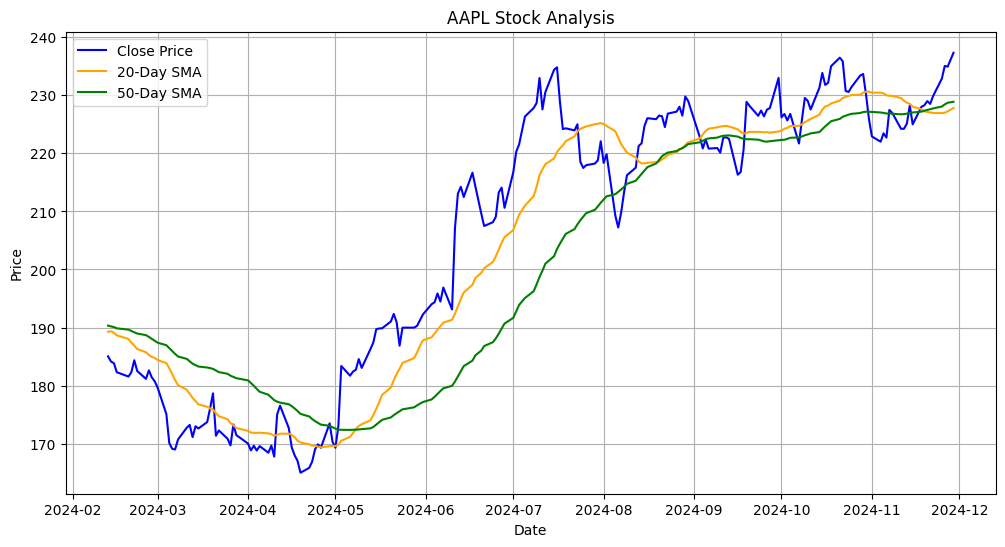

In [51]:
# 股票數據加載函數
def get_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    stock_data['20_SMA'] = stock_data['Close'].rolling(window=20).mean()
    stock_data['50_SMA'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['RSI'] = 100 - (100 / (1 + stock_data['Close'].pct_change().rolling(window=14).mean()))
    stock_data.dropna(inplace=True)
    return stock_data

# 模擬新聞數據
def get_fake_news_data(ticker):
    return [
        {"title": f"{ticker} reports higher-than-expected earnings"},
        {"title": f"Analysts upgrade {ticker} with strong buy rating"},
        {"title": f"Market volatility impacts {ticker}'s performance"},
    ]

#生成專業股票分析報告
def generate_report(ticker, hist, news):
    news_str = "\n".join([f"- {article['title']}" for article in news])
    prompt = (
        f"請為以下股票生成一份專業的財務分析報告，並用繁體中文回答：\n"
        f"股票代號：{ticker}\n"
        f"技術指標：\n"
        f"  - 20日均線：{hist['20_SMA'].iloc[-1]:.2f}\n"
        f"  - 50日均線：{hist['50_SMA'].iloc[-1]:.2f}\n"
        f"  - RSI 指數：{hist['RSI'].iloc[-1]:.2f}\n"
        f"近期新聞標題：\n"
        f"{news_str}\n\n"
        "請包含以下內容：\n"
        "1. 基於技術指標的股票表現分析。\n"
        "2. 新聞如何影響該股票的簡要分析。\n"
        "3. 一個專業的投資建議並給出分數（1-100）。\n"
    )

    # 使用新版 ChatCompletion API
    client = OpenAI()
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "你是一位專業的財務分析師，請用繁體中文回答問題。"},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content

# 繪製股票數據圖
def plot_stock_data(stock_data, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label="Close Price", color="blue")
    plt.plot(stock_data.index, stock_data['20_SMA'], label="20-Day SMA", color="orange")
    plt.plot(stock_data.index, stock_data['50_SMA'], label="50-Day SMA", color="green")
    plt.title(f"{ticker} Stock Analysis")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

# 主程式
def main():
    ticker = "AAPL"  # 替換為你想分析的股票代碼
    end = dt.date.today()
    start = end - dt.timedelta(days=365)

    # 加載股票數據和模擬新聞數據
    print(f"正在獲取 {ticker} 的數據...")
    stock_data = get_stock_data(ticker, start, end)
    news_data = get_fake_news_data(ticker)

    # 生成報告
    print("生成股票分析報告...")
    report = generate_report(ticker, stock_data, news_data)
    print(report)

    # 繪製圖表
    print("繪製股票數據圖表...")
    plot_stock_data(stock_data, ticker)

# 運行主程式
main()